In [20]:
import pandas as pd
from io import StringIO


In [3]:
data = """
Date,A,B,C,D,E,F,G
2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44
2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98
2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61
2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41
2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09
2008-03-27,24.38,163.46,115.4,27.09,19.72,28.25,59.62
2008-03-28,24.32,163.22,115.56,27.13,19.63,28.24,58.65
2008-03-31,24.19,164.02,115.54,26.74,19.55,28.43,59.2
2008-04-01,23.81,163.59,115.72,27.82,20.21,29.17,56.18
2008-04-02,24.03,163.32,115.11,28.22,20.42,29.38,56.64
2008-04-03,24.34,163.34,115.17,28.14,20.36,29.51,57.49
"""

In [10]:
df = pd.read_csv(StringIO(data))

In [11]:
print(df)

          Date      A       B       C      D      E      F      G
0   2008-03-18  24.68  164.93  114.73  26.27  19.21  28.87  63.44
1   2008-03-19  24.18  164.89  114.75  26.22  19.07  27.76  59.98
2   2008-03-20  23.99  164.63  115.04  25.78  19.01  27.04  59.61
3   2008-03-25  24.14  163.92  114.85  27.41  19.61  27.84  59.41
4   2008-03-26  24.44  163.45  114.84  26.86  19.53  28.02  60.09
5   2008-03-27  24.38  163.46  115.40  27.09  19.72  28.25  59.62
6   2008-03-28  24.32  163.22  115.56  27.13  19.63  28.24  58.65
7   2008-03-31  24.19  164.02  115.54  26.74  19.55  28.43  59.20
8   2008-04-01  23.81  163.59  115.72  27.82  20.21  29.17  56.18
9   2008-04-02  24.03  163.32  115.11  28.22  20.42  29.38  56.64
10  2008-04-03  24.34  163.34  115.17  28.14  20.36  29.51  57.49


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.set_index('Date', inplace=True)

In [14]:
print(df.dtypes)

A    float64
B    float64
C    float64
D    float64
E    float64
F    float64
G    float64
dtype: object


In [23]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [24]:
train_size = int(len(df) * 0.8)
train, test = df['A'][:train_size], df['A'][train_size:]

In [30]:
import warnings
warnings.filterwarnings("ignore")


In [31]:
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) parameters
model_fit = model.fit()

In [32]:
predictions = model_fit.forecast(steps=len(test))

In [33]:
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'ARIMA RMSE: {rmse}')

ARIMA RMSE: 0.22285405428660696


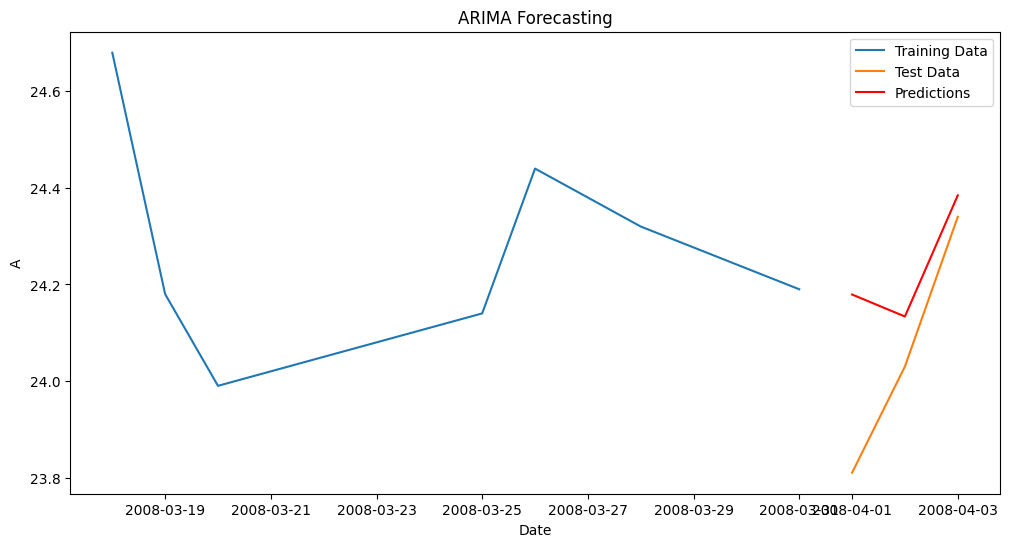

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, predictions, color='red', label='Predictions')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('A')
plt.legend()
plt.show()